<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_z_power_cable_%EB%B6%80%EB%B6%84%EB%B0%A9%EC%A0%84_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 다운로드 및 읽기

In [0]:
# 다운로드 받은 kaggle.json 파일을 코랩으로 업로드하기
# 먼저 캐글 사이트에서 개인 API용 키를 만들어서 다운 받아야 함
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hjkim3","key":"9b84f686edd69fbff8f3490ef0d18e58"}'}

In [0]:
# 업로드 확인
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Feb 11 02:47 kaggle.json


In [0]:
# Kaggle API client 설치
!pip install -q kaggle

In [0]:
# 폴더 지정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
# !kaggle datasets list

In [0]:
!kaggle competitions download -c vsb-power-line-fault-detection

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 38.9MB/s]
  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 36.7MB/s]
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 47.7MB/s]
100% 6.97G/6.97G [02:10<00:00, 46.7MB/s]
100% 6.97G/6.97G [02:10<00:00, 57.4MB/s]
100% 3.02G/3.02G [00:56<00:00, 57.7MB/s]
100% 3.02G/3.02G [00:56<00:00, 57.1MB/s]


In [0]:
# !head ~/.kaggle/datasets/stackoverflow/stack-overflow-2018-developer-survey/survey_results_public.csv

In [0]:
!ls


kaggle.json	   metadata_train.csv  sample_submission.csv  train.parquet.zip
metadata_test.csv  sample_data	       test.parquet.zip


In [0]:
import numpy as np # linear algebra
import pandas as pd

In [0]:
import os
print(os.listdir("."))

['.config', 'sample_submission.csv', 'metadata_test.csv', 'kaggle.json', 'train.parquet.zip', 'train.parquet', 'test.parquet.zip', 'metadata_train.csv', 'sample_data']


In [0]:
!pip install pyarrow

    100% |████████████████████████████████| 12.5MB 3.8MB/s 


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
PARENT_DATA_DIR_PATH = '.'
METADATA_TRAIN_FILE_PATH = os.path.join(PARENT_DATA_DIR_PATH, "metadata_train.csv")
TRAIN_DATA_FILE_PATH = os.path.join(PARENT_DATA_DIR_PATH, "train.parquet")

In [0]:
metadata_train = pd.read_csv(METADATA_TRAIN_FILE_PATH)
print("#samples:", len(metadata_train))
metadata_train.head(15)

#samples: 8712


,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
6,6,2,0,0
7,7,2,1,0
8,8,2,2,0
9,9,3,0,0


In [0]:
metadata_train.target.value_counts()/3

0    2729.0
1     175.0
Name: target, dtype: float64

In [0]:
# 전체 데이터 로드!
# traindataDF = pq.read_pandas(TRAIN_DATA_FILE_PATH).to_pandas()
# traindataDF.info()

In [0]:
# 일부 데이터만 로드
traindataDFsample = pq.read_pandas(TRAIN_DATA_FILE_PATH, columns=[str(i) for i in range(15)]).to_pandas()          
traindataDFsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 15 columns):
0     800000 non-null int8
1     800000 non-null int8
2     800000 non-null int8
3     800000 non-null int8
4     800000 non-null int8
5     800000 non-null int8
6     800000 non-null int8
7     800000 non-null int8
8     800000 non-null int8
9     800000 non-null int8
10    800000 non-null int8
11    800000 non-null int8
12    800000 non-null int8
13    800000 non-null int8
14    800000 non-null int8
dtypes: int8(15)
memory usage: 11.4 MB


In [0]:
traindataDFsample.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,-0.960271,-0.194125,-0.043555,-0.997401,-0.175586,-0.036004,-1.146185,-1.952695,0.873370,-1.359634,0.728509,-0.817065,-1.011068,-0.153133,-0.030229
std,13.870733,13.037143,13.684291,13.673639,12.938380,13.545785,14.064219,14.774433,14.815678,15.704631,15.097074,15.830926,13.748709,12.955191,13.538682
min,-39.000000,-30.000000,-28.000000,-77.000000,-40.000000,-43.000000,-49.000000,-29.000000,-39.000000,-128.000000,-118.000000,-128.000000,-98.000000,-80.000000,-128.000000
25%,-13.000000,-12.000000,-13.000000,-14.000000,-13.000000,-13.000000,-15.000000,-16.000000,-14.000000,-16.000000,-14.000000,-16.000000,-14.000000,-12.000000,-13.000000
50%,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-2.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000
75%,11.000000,12.000000,12.000000,12.000000,12.000000,13.000000,12.000000,12.000000,15.000000,13.000000,15.000000,14.000000,12.000000,12.000000,13.000000
max,33.000000,26.000000,39.000000,52.000000,33.000000,58.000000,55.000000,28.000000,31.000000,127.000000,118.000000,127.000000,127.000000,75.000000,127.000000


## 데이터 그려보기

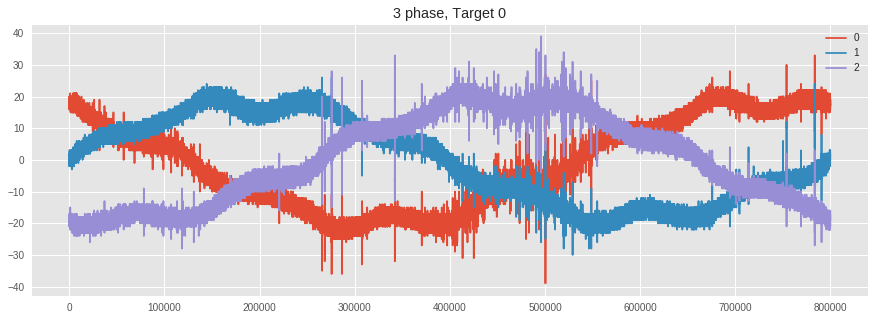

In [0]:
# 3상 신호 그려보기
traindataDFsample.iloc[:,:3].plot(title="3 phase, Target 0", figsize=(15,5));

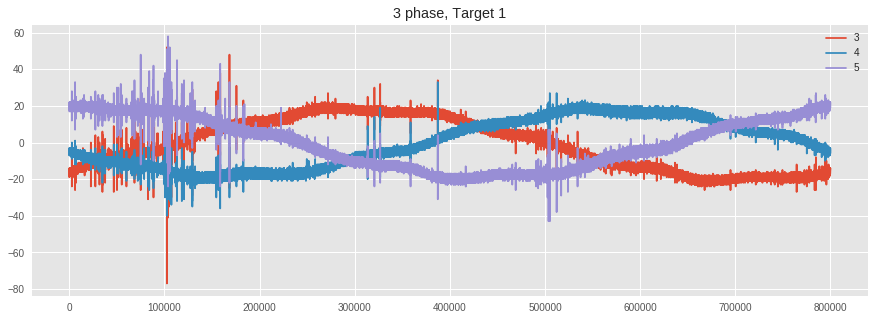

In [0]:
traindataDFsample.iloc[:,3:6].plot(title="3 phase, Target 1", figsize=(15,5));

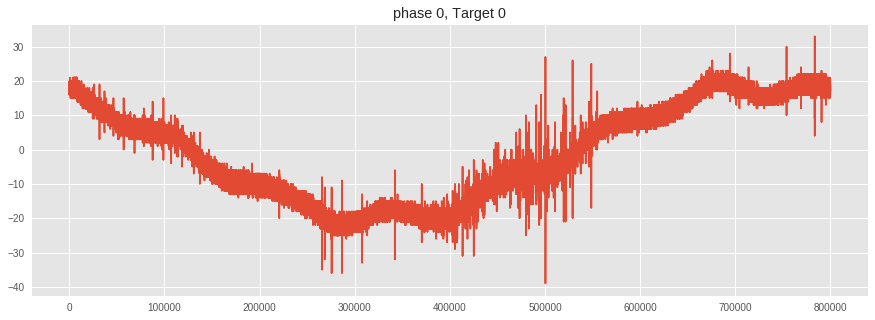

In [0]:
traindataDFsample.iloc[:,0].plot(title="phase 0, Target 0", figsize=(15,5));

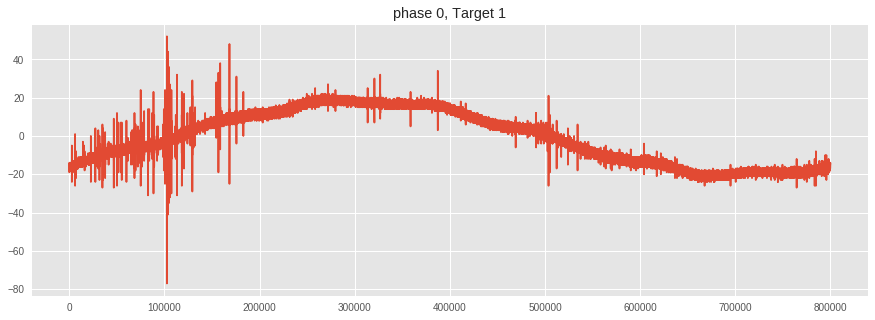

In [0]:
traindataDFsample.iloc[:,3].plot(title="phase 0, Target 1", figsize=(15,5));

In [0]:
# 타겟 변수에 따른 구분
target0df = metadata_train[metadata_train['target'] == 0]
target1df = metadata_train[metadata_train['target'] == 1]
print("target0data shape:", target0df.shape)
print("target1data shape:", target1df.shape)

target0data shape: (8187, 4)
target1data shape: (525, 4)


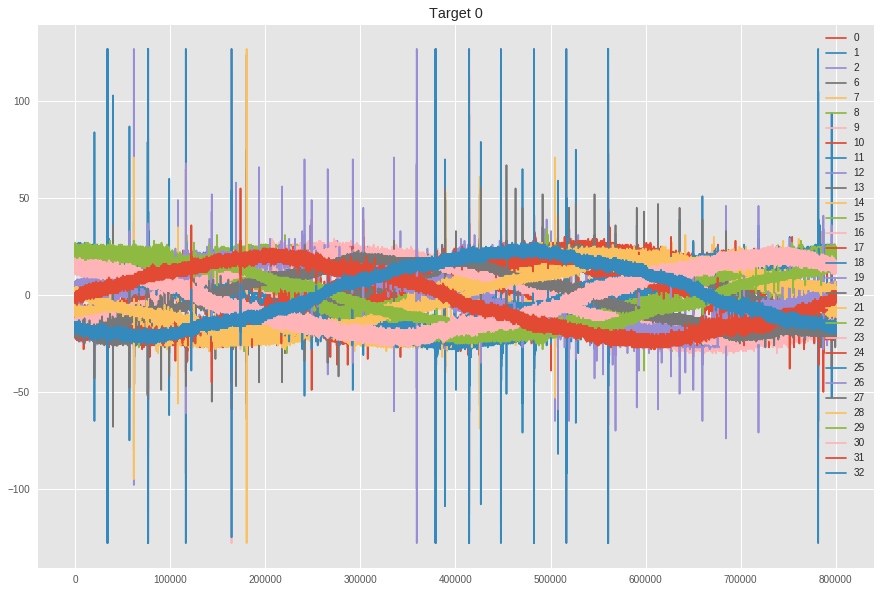

In [0]:
nSamples = 30
target0samplecols = [str(i) for i in list(target0df.iloc[:nSamples].signal_id)]
target0sampledata = pq.read_pandas(TRAIN_DATA_FILE_PATH, columns=target0samplecols).to_pandas()
target0sampledata.plot(title="Target 0", figsize=(15,10))


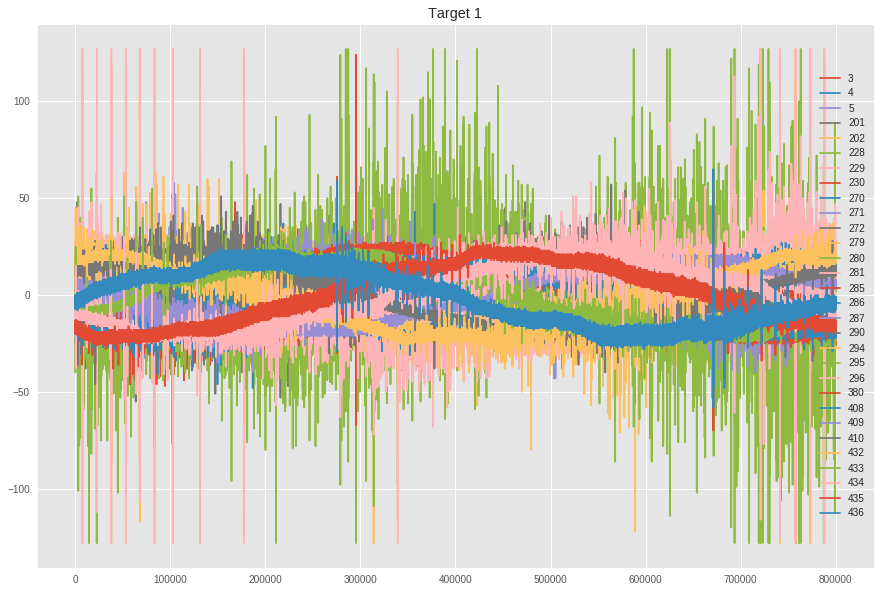

In [0]:
target1samplecols = [str(i) for i in list(target1df.iloc[:nSamples].signal_id)]
target1sampledata = pq.read_pandas(TRAIN_DATA_FILE_PATH, columns=target1samplecols).to_pandas()
target1sampledata.plot(title="Target 1", figsize=(15,10))

## 데이터 1/8로 축소

In [0]:
# 1/8 로 데이터 크기를 평균하여 줄인다.
sample = traindataDFsample.iloc[:,3]
sample.shape


(800000,)

In [0]:
def reduce_sample(_sample, avgOver=8):
    preVal = 0
    processed_sample_list = []
    for index in range(avgOver, _sample.shape[0]+avgOver, avgOver):
        tmpdf = _sample.iloc[preVal:index]
        avgVal = tmpdf.sum()/avgOver
        processed_sample_list.append(avgVal)
        preVal = index
    return pd.Series(processed_sample_list)
processed_sample = reduce_sample(sample, 8)
processed_sample.shape


(100000,)

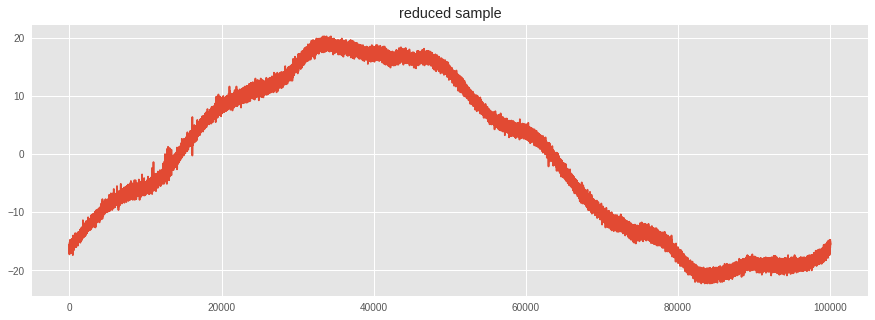

In [0]:
processed_sample.plot(title="reduced sample", figsize=(15,5))
